# Steepest Descent Method

In [50]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from scipy import sparse
import os
import re

In [51]:
def images_to_matrix(folder_path, convert_gray=False, is_binary=False, cap=False, seed=0, ratio=1.0):
    files = os.listdir(folder_path)
    if cap:
        files.sort(key=lambda f: int(
            re.search('hadamard64_(\d+).png', f).group(1)))
    else:
        files.sort(key=lambda f: int(
            re.search('hadamard_(\d+).png', f).group(1)))

    selected_files = files

    if seed != 0:
        random.seed(seed)
        random.shuffle(files)
        number_of_files_to_load = int(len(files) * ratio)
        selected_files = files[:number_of_files_to_load]
        if cap:
            selected_files.sort(key=lambda f: int(re.search('hadamard64_(\d+).png', f).group(1)))
        else:
            selected_files.sort(key=lambda f: int(re.search('hadamard_(\d+).png', f).group(1)))

    images = []

    for file in selected_files:
        print(file)
        img = Image.open(os.path.join(folder_path, file))
        if convert_gray:
            img = img.convert('L')
        if is_binary:
            img = img.point(lambda x: 255 if x else 0, 'L')
        img_array = np.asarray(img).flatten()
        img_array = img_array / 255
        images.append(img_array)
    return np.column_stack(images)


def update_H(H, G, F, gamma, threshold):
    i = 1
    H_prev = H.copy()
    while True:
        grad = 2 * (H @ F - G) @ F.T
        H = H - gamma * grad
        norm = np.linalg.norm(grad, 'fro')
        error = np.linalg.norm(H - H_prev, 'fro')

        print('iter: {}, norm: {}, error: {}'.format(i, norm, error))
        if norm < threshold:
            break
        H_prev = H.copy()
        i += 1
    return H


In [52]:
# パラメータ設定
n = 64
m = 128
gamma = 0.0001
threshold = 0.001

In [53]:
# 真のシステム行列の計算
G_full = images_to_matrix('../data/hadamard'+str(n)+'_cap_W_sim/',
                     convert_gray=True, cap=True)
F_full = images_to_matrix('../data/Hadamard'+str(n)+'_input/', is_binary=True)
H1 = np.zeros((m**2, n**2))
G1s = []
for i in range(n**2):
    G1s.append(G_full[:, 0])
H1 = np.column_stack(G1s)
F_hat_full = 2*F_full-1
G_hat_full = 2*G_full-H1
H_true = G_hat_full@F_hat_full.T/(n**2)
# plt.figure(figsize=(12, 8))
# sns.heatmap(H_true, annot=False, cmap='viridis')

hadamard64_1.png
hadamard64_2.png
hadamard64_3.png
hadamard64_4.png
hadamard64_5.png
hadamard64_6.png
hadamard64_7.png
hadamard64_8.png
hadamard64_9.png
hadamard64_10.png
hadamard64_11.png
hadamard64_12.png
hadamard64_13.png
hadamard64_14.png
hadamard64_15.png
hadamard64_16.png
hadamard64_17.png
hadamard64_18.png
hadamard64_19.png
hadamard64_20.png
hadamard64_21.png
hadamard64_22.png
hadamard64_23.png
hadamard64_24.png
hadamard64_25.png
hadamard64_26.png
hadamard64_27.png
hadamard64_28.png
hadamard64_29.png
hadamard64_30.png
hadamard64_31.png
hadamard64_32.png
hadamard64_33.png
hadamard64_34.png
hadamard64_35.png
hadamard64_36.png
hadamard64_37.png
hadamard64_38.png
hadamard64_39.png
hadamard64_40.png
hadamard64_41.png
hadamard64_42.png
hadamard64_43.png
hadamard64_44.png
hadamard64_45.png
hadamard64_46.png
hadamard64_47.png
hadamard64_48.png
hadamard64_49.png
hadamard64_50.png
hadamard64_51.png
hadamard64_52.png
hadamard64_53.png
hadamard64_54.png
hadamard64_55.png
hadamard64_56.png
h

In [54]:
# 初期化
H = np.zeros((m**2, n**2))
ratio = 0.5

G = images_to_matrix('../data/hadamard'+str(n)+'_cap_W_sim/',
                     convert_gray=True, cap=True, seed=2, ratio=ratio)

hadamard64_1.png
hadamard64_2.png
hadamard64_4.png
hadamard64_5.png
hadamard64_9.png
hadamard64_10.png
hadamard64_12.png
hadamard64_14.png
hadamard64_16.png
hadamard64_17.png
hadamard64_19.png
hadamard64_23.png
hadamard64_24.png
hadamard64_25.png
hadamard64_27.png
hadamard64_32.png
hadamard64_36.png
hadamard64_38.png
hadamard64_40.png
hadamard64_41.png
hadamard64_42.png
hadamard64_45.png
hadamard64_46.png
hadamard64_49.png
hadamard64_50.png
hadamard64_51.png
hadamard64_53.png
hadamard64_54.png
hadamard64_55.png
hadamard64_56.png
hadamard64_57.png
hadamard64_58.png
hadamard64_59.png
hadamard64_60.png
hadamard64_61.png
hadamard64_62.png
hadamard64_63.png
hadamard64_64.png
hadamard64_67.png
hadamard64_68.png
hadamard64_69.png
hadamard64_70.png
hadamard64_77.png
hadamard64_78.png
hadamard64_81.png
hadamard64_83.png
hadamard64_85.png
hadamard64_86.png
hadamard64_89.png
hadamard64_91.png
hadamard64_92.png
hadamard64_93.png
hadamard64_94.png
hadamard64_96.png
hadamard64_106.png
hadamard64_107

In [55]:
F = images_to_matrix('../data/Hadamard'+str(n)+'_input/', is_binary=True, seed=2, ratio=ratio)

hadamard_1.png
hadamard_2.png
hadamard_4.png
hadamard_5.png
hadamard_9.png
hadamard_10.png
hadamard_12.png
hadamard_14.png
hadamard_16.png
hadamard_17.png
hadamard_19.png
hadamard_23.png
hadamard_24.png
hadamard_25.png
hadamard_27.png
hadamard_32.png
hadamard_36.png
hadamard_38.png
hadamard_40.png
hadamard_41.png
hadamard_42.png
hadamard_45.png
hadamard_46.png
hadamard_49.png
hadamard_50.png
hadamard_51.png
hadamard_53.png
hadamard_54.png
hadamard_55.png
hadamard_56.png
hadamard_57.png
hadamard_58.png
hadamard_59.png
hadamard_60.png
hadamard_61.png
hadamard_62.png
hadamard_63.png
hadamard_64.png
hadamard_67.png
hadamard_68.png
hadamard_69.png
hadamard_70.png
hadamard_77.png
hadamard_78.png
hadamard_81.png
hadamard_83.png
hadamard_85.png
hadamard_86.png
hadamard_89.png
hadamard_91.png
hadamard_92.png
hadamard_93.png
hadamard_94.png
hadamard_96.png
hadamard_106.png
hadamard_107.png
hadamard_108.png
hadamard_109.png
hadamard_114.png
hadamard_116.png
hadamard_117.png
hadamard_120.png
hadam

In [56]:
H1 = np.zeros((m**2, int(n**2*ratio)))
G1s = []
for i in range(int(n**2*ratio)):
    G1s.append(G[:, 0])
H1 = np.column_stack(G1s)
F_hat = 2*F-1
G_hat = 2*G-H1
# plt.figure(figsize=(12, 8))
# sns.heatmap(F_hat, annot=False, cmap='viridis')
# plt.figure(figsize=(12, 8))
# sns.heatmap(G_hat, annot=False, cmap='viridis')

iter: 1, norm: 199630.29105391048, error: 19.963029105390962
iter: 2, norm: 36093.156622548246, error: 3.609315662254689
iter: 3, norm: 6525.642717356469, error: 0.6525642717356297
iter: 4, norm: 1179.8362032980567, error: 0.11798362032980961
iter: 5, norm: 213.31438555628424, error: 0.021331438555628253
iter: 6, norm: 38.567240908576665, error: 0.0038567240908576367
iter: 7, norm: 6.9729571562707315, error: 0.0006972957156270739
iter: 8, norm: 1.260710653853764, error: 0.00012607106538537242
iter: 9, norm: 0.22793648621681037, error: 2.2793648621679997e-05
iter: 10, norm: 0.04121091670800249, error: 4.121091670802605e-06
iter: 11, norm: 0.007450933740842861, error: 7.450933740831353e-07
iter: 12, norm: 0.0013471288203031767, error: 1.3471288203528328e-07
iter: 13, norm: 0.00024356089052687618, error: 2.4356089060588454e-08


<AxesSubplot:>

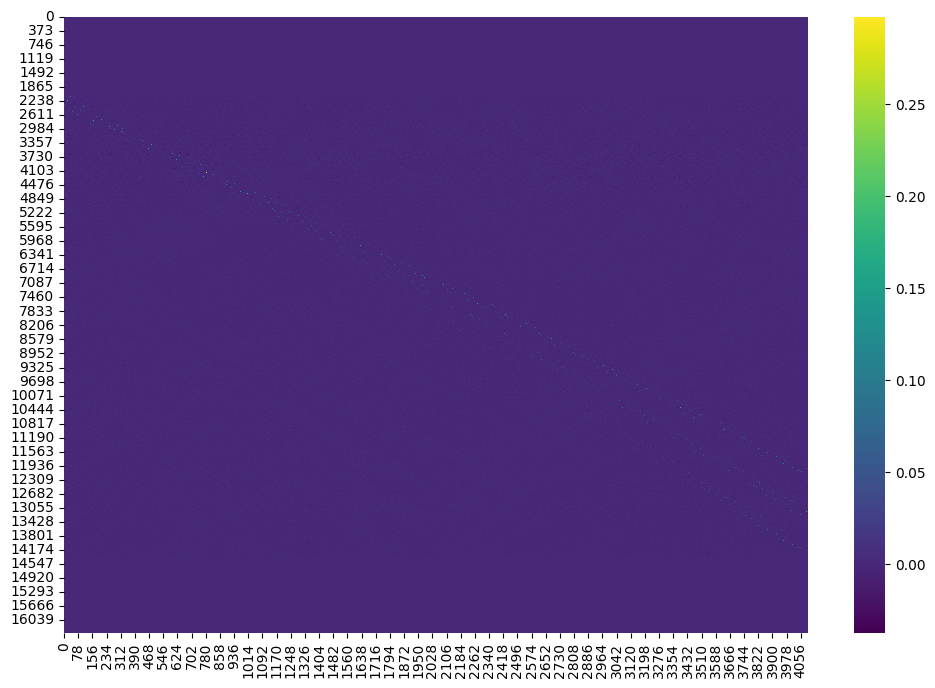

In [57]:
# Hを更新
H = update_H(H, G_hat, F_hat, gamma, threshold)

np.save('../data/systemMatrix/H_matrix.npy', H)

plt.figure(figsize=(12, 8))
sns.heatmap(H, annot=False, cmap='viridis')

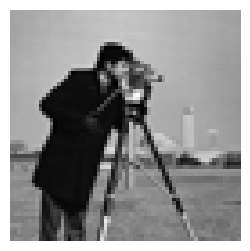

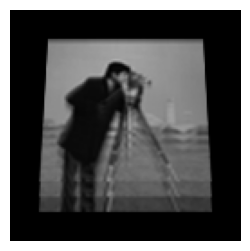

In [58]:
sample_image = Image.open('../data/sample_image64/Cameraman64.png')
sample_image = sample_image.convert('L')
sample_image = np.asarray(sample_image).flatten()/255

plt.figure(figsize=(3, 3))
plt.imshow(sample_image.reshape(n,n), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(3, 3))
grand_truth = Image.open('../data/sample_image64_cap_sim/Cameraman64.png')
plt.imshow(grand_truth, cmap='gray')
plt.axis('off')
plt.show()

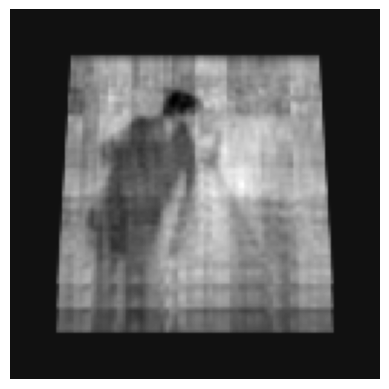

In [59]:
Hf = H@sample_image
# plt.figure(figsize=(12, 8))
# sns.heatmap(Hf.reshape(m,m), annot=False, cmap='viridis')
plt.imshow(Hf.reshape(m, m), cmap='gray')
plt.axis('off')
plt.savefig('../data/240130/Cameraman64_'+str(ratio) +
            '.png', bbox_inches='tight', pad_inches=0)
plt.show()

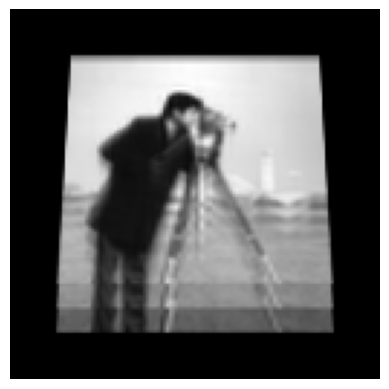

In [60]:
Hf_true = H_true@sample_image
plt.imshow(Hf_true.reshape(m, m), cmap='gray')
plt.axis('off')
# plt.savefig('../data/240130/Cameraman64_.png', bbox_inches='tight', pad_inches=0)
plt.show()
# plt.figure(figsize=(12, 8))
# sns.heatmap(HF, annot=False, cmap='viridis')

In [61]:
rem = np.linalg.norm(H_true-H, 'fro')
print(rem)

24.050451623941754
